In [31]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import h5py
import os
from sklearn.preprocessing import StandardScaler
working_directory = os.getcwd()


In [32]:
# Reading in the file and assigning variable names for the first output, gam_BG_k0_s0
path_train = '/Downloads/train50k_clean_qlk_v262_jet_dataset_kspectra.h5'
path_test = '/Downloads/test50k_clean_qlk_v262_jet_dataset_kspectra.h5'
#Standard scaling meaning all elements are changed according to the equation: 
# x = x-x_mean/(std) where std is standard deviation and x_mean is the mean value of all elements.
scaler_input = StandardScaler()
scaler_output = StandardScaler()

f = h5py.File(working_directory+path_train, 'r')
input_params = f['input']['axis0'][...]
input_train = f['input']['block0_values'][...]
#saves scaling values
scaler_input = scaler_input.fit(input_train)
standardized_input_train = scaler_input.transform(input_train)
output_param = f['spectrum']['axis0'][...]
output_train = f['spectrum']['block0_values'][...]
scaler_output = scaler_output.fit(output_train)
standardized_output_train = scaler_output.transform(output_train)
f.close()
f = h5py.File(working_directory+path_test, 'r')
input_test = f['input']['block0_values'][...]
output_test = f['spectrum']['block0_values'][...]
standardized_input_test = scaler_input.transform(input_test)
standardized_output_test = scaler_output.transform(output_test)

f.close()


In [33]:
def outputTrainFileReader(column): 
    f = h5py.File(working_directory+path_train, 'r')
    output_train = f['spectrum']['block0_values'][:,column]
    # need to reshape to (-1,1) for standardscaler to allow 1D vector.
    output_train = output_train.reshape(-1,1) 
    return scaler_input.fit_transform(output_train)
def outputTestFileReader (column, scaler):
    scaler_output = scaler
    f = h5py.File(working_directory+path_test, 'r')
    output_test = f['spectrum']['block0_values'][:,column]
    output_test = output_test.reshape(-1,1) 
    return scaler_output.transform(output_test)
    
    

In [34]:
# Model configuration
batch_size = 500
loss_function = 'mae'
no_epochs = 150
optimizer = 'adam'
validation_split = 0.2
verbosity = 0


In [35]:
# Create the model
model = Sequential()
model.add(Dense(100, input_shape=(11,), activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='linear'))
# Compile the model
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])



In [50]:
# Fit data to model
MAE_titles = ['Gam_s0', 'Ome_s0', 'Gam_s1', 'Ome_s1']
x = range(18)
for i in range(4):
    MAE_list = []
    for j in range (18):
        
        history = model.fit(standardized_input_train, standardized_output_train[:,18*i+j],
                batch_size=batch_size,
                epochs=no_epochs,
                verbose = verbosity,
                validation_split=validation_split)
        predictions = model.predict(standardized_input_train)
        loss,_ = model.evaluate(standardized_input_test,standardized_output_test[:,18*i+j])
        MAE_list.append(loss)
        fig, ax = plt.subplots()
        ax.scatter(predictions,standardized_output_test[:,18*i+j])
        ax.set_xlabel('Predicted values', 
                   fontweight ='bold')
        ax.set_ylabel('Actual values')
        ax.set_title(output_param[i])
        plt.savefig(str(output_param[i])+ '72NN.jpg')
        plt.close()
    fig, ax = plt.subplots()
    ax.scatter(x,MAE_list)
    ax.plot(x,MAE_list)
    #ax.scatter(x,Malte_MAE_list)
    #ax.plot(x,Malte_MAE_list)
    ax.set_xlabel('K_rho', 
                   fontweight ='bold')
    ax.set_ylabel('Mean absolute error')
    ax.set_title(MAE_titles[i])
    plt.savefig(MAE_titles[i]+'.jpg')
    plt.show()

1563/1563 [==============================] - 3s 2ms/step - loss: 0.1639 - accuracy: 0.0000e+00


KeyboardInterrupt: 

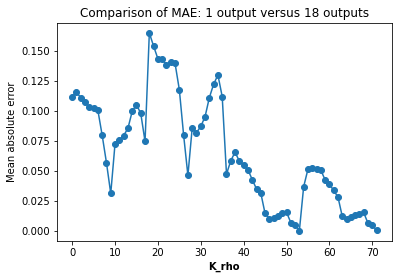

In [47]:
x = range(18)
Malte_MAE_list = [3.411759436130523682e-01,
3.262131512165069580e-01,
3.199368417263031006e-01,
3.216458261013031006e-01,
3.216275870800018311e-01,
3.518010377883911133e-01,
3.846131563186645508e-01,
3.625447750091552734e-01,
2.253041714429855347e-01,
1.000245586037635803e-01,
3.389628529548645020e-01,
3.746427595615386963e-01,
3.772702515125274658e-01,
3.879458606243133545e-01,
3.960612416267395020e-01,
3.832634687423706055e-01,
3.358456790447235107e-01,
2.516548335552215576e-01]


In [ ]:
#All code in single cell 

import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import h5py
import os
from sklearn.preprocessing import StandardScaler
working_directory = os.getcwd()
# Reading in the file and assigning variable names for the first output, gam_BG_k0_s0
path_train = '/Downloads/train50k_clean_qlk_v262_jet_dataset_kspectra.h5'
path_test = '/Downloads/test50k_clean_qlk_v262_jet_dataset_kspectra.h5'
#Standard scaling meaning all elements are changed according to the equation: 
# x = x-x_mean/(std) where std is standard deviation and x_mean is the mean value of all elements.
scaler = StandardScaler()

f = h5py.File(working_directory+path_train, 'r')
input_params = f['input']['axis0'][...]
input_train = f['input']['block0_values'][...]
standardized_input_train = scaler.fit_transform(input_train)
output_param = f['spectrum']['axis0'][...]

#standardized_output_train = scaler.fit_transform(output_train)
f.close()
f = f = h5py.File(working_directory+path_test, 'r')
input_test = f['input']['block0_values'][...]
output_test = f['spectrum']['block0_values'][:,0]
f.close()

def outputTrainFileReader(column): 
    f = h5py.File(working_directory+path_train, 'r')
    output_train = f['spectrum']['block0_values'][:,column]
    # need to reshape to (-1,1) for standardscaler to allow 1D vector.
    output_train = output_train.reshape(-1,1) 
    return scaler.fit_transform(output_train)
# Model configuration
batch_size = 500
loss_function = 'mae'
no_epochs = 150
optimizer = 'adam'
validation_split = 0.2
verbosity = 0

# Create the model
model = Sequential()
model.add(Dense(11, input_shape=(11,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))
# Compile the model
model.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])
# Fit data to model
MAE_list = []
for i in range(18):
    standardized_output_train = outputTrainFileReader(i)
    history = model.fit(standardized_input_train, standardized_output_train,
                batch_size=batch_size,
                epochs=no_epochs,
                verbose = verbosity,
                validation_split=validation_split)
    predictions = model.predict(standardized_input_train)
    loss,_ = model.evaluate(standardized_input_train,standardized_output_train)
    MAE_list.append(loss)
    fig, ax = plt.subplots()
    ax.scatter(predictions,standardized_output_train)
    ax.set_xlabel('Predicted values', 
               fontweight ='bold')
    ax.set_ylabel('Actual vales')
    ax.set_title(output_param[i])
    plt.savefig(str(output_param[i])+ '.jpg')
    plt.close()

#Mean absolute error plot
x = range(18)
Malte_MAE_list = [3.411759436130523682e-01,
3.262131512165069580e-01,
3.199368417263031006e-01,
3.216458261013031006e-01,
3.216275870800018311e-01,
3.518010377883911133e-01,
3.846131563186645508e-01,
3.625447750091552734e-01,
2.253041714429855347e-01,
1.000245586037635803e-01,
3.389628529548645020e-01,
3.746427595615386963e-01,
3.772702515125274658e-01,
3.879458606243133545e-01,
3.960612416267395020e-01,
3.832634687423706055e-01,
3.358456790447235107e-01,
2.516548335552215576e-01]
fig, ax = plt.subplots()
ax.scatter(x,MAE_list)
ax.plot(x,MAE_list)
ax.scatter(x,Malte_MAE_list)
ax.plot(x,Malte_MAE_list)
ax.set_xlabel('K_rho', 
               fontweight ='bold')
ax.set_ylabel('Mean absolute error')
ax.set_title('Comparison of MAE: 1 output versus 18 outputs')
plt.savefig('MAE_Comparison.jpg')
plt.show()


In [52]:
x = range(18)

In [53]:
print(x)

range(0, 18)
